In [59]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [2]:

train = np.loadtxt('train.csv')
trainLabel = np.loadtxt('trainLabel.csv').astype(int)
test = np.loadtxt('test.csv')
testLabel = np.loadtxt('testLabel.csv').astype(int)

modelind

In [28]:
model=keras.Sequential()
model.add(keras.Input(shape=(10,)))
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(5,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist=model.fit(train,trainLabel,validation_split=0.2,epochs=80)

Epoch 1/80
89/89 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.5799 - val_loss: 0.6669 - val_accuracy: 0.6020
Epoch 2/80
89/89 [==============================] - 0s 793us/step - loss: 0.6666 - accuracy: 0.5940 - val_loss: 0.6625 - val_accuracy: 0.6020
Epoch 3/80
89/89 [==============================] - 0s 893us/step - loss: 0.6623 - accuracy: 0.5940 - val_loss: 0.6585 - val_accuracy: 0.6048
Epoch 4/80
89/89 [==============================] - 0s 902us/step - loss: 0.6578 - accuracy: 0.6011 - val_loss: 0.6530 - val_accuracy: 0.6076
Epoch 5/80
89/89 [==============================] - 0s 766us/step - loss: 0.6519 - accuracy: 0.6139 - val_loss: 0.6436 - val_accuracy: 0.6374
Epoch 6/80
89/89 [==============================] - 0s 912us/step - loss: 0.6426 - accuracy: 0.6408 - val_loss: 0.6358 - val_accuracy: 0.6416
Epoch 7/80
89/89 [==============================] - 0s 847us/step - loss: 0.6352 - accuracy: 0.6507 - val_loss: 0.6286 - val_accuracy: 0.6516
Epoch 8/

89/89 [==============================] - 0s 895us/step - loss: 0.5494 - accuracy: 0.7329 - val_loss: 0.5461 - val_accuracy: 0.7408
Epoch 59/80
89/89 [==============================] - 0s 799us/step - loss: 0.5482 - accuracy: 0.7389 - val_loss: 0.5494 - val_accuracy: 0.7365
Epoch 60/80
89/89 [==============================] - 0s 811us/step - loss: 0.5484 - accuracy: 0.7350 - val_loss: 0.5454 - val_accuracy: 0.7394
Epoch 61/80
89/89 [==============================] - 0s 808us/step - loss: 0.5481 - accuracy: 0.7411 - val_loss: 0.5446 - val_accuracy: 0.7365
Epoch 62/80
89/89 [==============================] - 0s 772us/step - loss: 0.5469 - accuracy: 0.7347 - val_loss: 0.5436 - val_accuracy: 0.7380
Epoch 63/80
89/89 [==============================] - 0s 788us/step - loss: 0.5469 - accuracy: 0.7379 - val_loss: 0.5434 - val_accuracy: 0.7380
Epoch 64/80
89/89 [==============================] - 0s 680us/step - loss: 0.5464 - accuracy: 0.7354 - val_loss: 0.5421 - val_accuracy: 0.7394
Epoch 65/80

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [16]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Training_Loss')

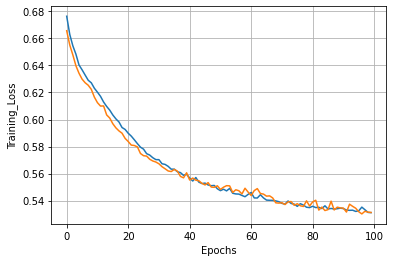

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training_Loss')

Text(0, 0.5, 'Training Accuracy')

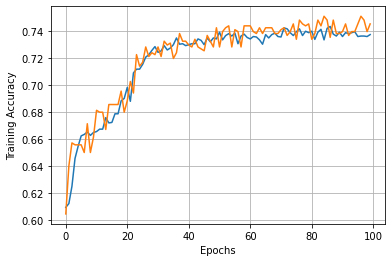

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

In [29]:
loss,accuracy=model.evaluate(test,testLabel)
print('test set accuracy', accuracy * 100)

28/28 [==============================] - 0s 570us/step - loss: 0.5487 - accuracy: 0.7259
test set accuracy 72.59343266487122


In [41]:
preds=model.predict(test)
preds=preds.flatten()
print('shape of pred', preds.shape)
preds[:4]

shape of pred (883,)


array([0.6561464 , 0.73129916, 0.30581802, 0.8580393 ], dtype=float32)

In [45]:
cpredslabels= []
for element in preds:
    cpredslabels.append(int(np.round(element)))
cpredslabelsAr=np.array(cpredslabels)
  

In [46]:
print(cpredslabelsAr[:10])
print(testLabel[:10])

[1 1 0 1 0 1 0 1 0 1]
[1 1 1 1 1 1 1 1 0 1]


In [47]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, accuracy_score, average_precision_score, precision_recall_fscore_support)

In [49]:
print(classification_report(testLabel, cpredslabelsAr))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       357
           1       0.76      0.79      0.77       526

    accuracy                           0.73       883
   macro avg       0.72      0.71      0.71       883
weighted avg       0.72      0.73      0.72       883



Text(33.0, 0.5, 'Truth')

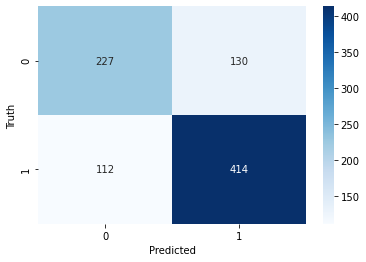

In [61]:
confusion_matrix=tf.math.confusion_matrix(labels=testLabel,predictions=cpredslabelsAr)
sns.heatmap(confusion_matrix,annot=True,cmap=plt.cm.Blues,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')